This Project will be divided into Two preliminary parts :

1st Part : Sentimental analysis

2nd part : Stock Price Time Series Analysis

Before merging the two parts and conduct a complete stock price prediction.

**1 - Sentimental analysis of news headlines.**

The needed packages are pandas for dataframe handling and ntlk which stands for Natural Language Processing Toolkit.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df_sa = pd.read_csv('/content/sample_data/india-news-headlines.csv')
df_sa

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
# Add empty column for sentiment labels
df_sa['sentiment_label'] = ""

In [ ]:
# Download stopwords and punkt tokenizer from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Preprocess the data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert to lowercase
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]  # Apply stemming and remove stopwords
    return ' '.join(filtered_tokens)

df_sa['processed_text'] = df_sa['headline_text'].apply(preprocess_text)


In [ ]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis and populate the 'sentiment_label' column
df_sa['sentiment_label'] = df_sa['headline_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_sa

,publish_date,headline_category,headline_text,sentiment_label,processed_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,0.2924,statu quo disturb ayodhya say vajpaye
1,20010102,unknown,Fissures in Hurriyat over Pak visit,0.0000,fissur hurriyat pak visit
2,20010102,unknown,America's unwanted heading for India?,-0.2263,america unwant head india
3,20010102,unknown,For bigwigs; it is destination Goa,0.0000,bigwig destin goa
4,20010102,unknown,Extra buses to clear tourist traffic,0.3818,extra buse clear tourist traffic
...,...,...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...,-0.5267,j k sack cop employe terror link
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,0.5106,ranbir kapoor say kapoor enjoy alcohol food en...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...,-0.2732,case drop nil southern district tamil nadu vac...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...,0.0000,tamil nadu see margin rise covid case new patient


Let us create a new data frame containing the date and the sentiment level score

In [ ]:
df_1 = df_sa[['publish_date', 'sentiment_label']].copy()

In [ ]:
df_1

,publish_date,sentiment_label
0,20010102,0.2924
1,20010102,0.0000
2,20010102,-0.2263
3,20010102,0.0000
4,20010102,0.3818
...,...,...
3650965,20220331,-0.5267
3650966,20220331,0.5106
3650967,20220331,-0.2732
3650968,20220331,0.0000


In [ ]:
print(df_1.dtypes)

publish_date         int64
sentiment_label    float64
dtype: object


In [ ]:
df_1['publish_date'] = df_1['publish_date'].astype(str)
df_1['publish_date'] = pd.to_datetime(df_1['publish_date'])

In [ ]:
df_1

,Date,Open,High,Low,Close,Adj Close,Volume,Close_ma2
0,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0,4333.899902
1,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0,4328.679932
2,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0,4323.639893
3,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0,4307.635010
4,1997-07-08,4285.649902,4313.000000,4252.490234,4306.390137,4306.390137,0,4298.920166
...,...,...,...,...,...,...,...,...
6381,2023-05-29,62801.539062,63026.000000,62801.539062,62846.378906,62846.378906,9600,62674.035156
6382,2023-05-30,62839.851562,63036.121094,62737.398438,62969.128906,62969.128906,7800,62907.753906
6383,2023-05-31,62839.968750,62876.769531,62401.019531,62622.238281,62622.238281,7300,62795.683594
6384,2023-06-01,62736.468750,62762.410156,62359.140625,62428.539062,62428.539062,8000,62525.388672


In [ ]:
average_df = df_1.groupby('publish_date')['sentiment_label'].mean().reset_index()

In [ ]:
# Define thresholds
negative_threshold = 0
positive_threshold = 0

# Create the new column
average_df['Sentiment_Category'] = ''

# Categorize sentiment
average_df.loc[average_df['sentiment_label'] < negative_threshold, 'Sentiment_Category'] = 'Negative'
average_df.loc[average_df['sentiment_label'] == 0, 'Sentiment_Category'] = 'Neutral'
average_df.loc[average_df['sentiment_label'] > positive_threshold, 'Sentiment_Category'] = 'Positive'


In [ ]:
average_df

,publish_date,sentiment_label,Sentiment_Category
0,2001-01-02,-0.018231,Negative
1,2001-01-03,-0.014800,Negative
2,2001-01-04,0.009842,Positive
3,2001-01-05,0.028646,Positive
4,2001-01-06,-0.019683,Negative
...,...,...,...
7712,2022-03-27,-0.086198,Negative
7713,2022-03-28,-0.049460,Negative
7714,2022-03-29,-0.065885,Negative
7715,2022-03-30,-0.077454,Negative


In [ ]:
# Save the updated dataset with sentiment labels
average_df.to_csv('Updated-india-news.csv', index=False)

Now that the first part is done, it is time to take care of the second part which is the stock price dataset analysis.

**2- Time Series Analysis**

In [ ]:
# Load the dataset
stock = pd.read_csv('/content/sample_data/historical_data.csv')

# Convert the 'Date' column to datetime
stock['Date'] = pd.to_datetime(stock['Date'])

stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0
1,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0
2,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0
3,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0
4,1997-07-08,4285.649902,4313.000000,4252.490234,4306.390137,4306.390137,0
...,...,...,...,...,...,...,...
6381,2023-05-29,62801.539062,63026.000000,62801.539062,62846.378906,62846.378906,9600
6382,2023-05-30,62839.851562,63036.121094,62737.398438,62969.128906,62969.128906,7800
6383,2023-05-31,62839.968750,62876.769531,62401.019531,62622.238281,62622.238281,7300
6384,2023-06-01,62736.468750,62762.410156,62359.140625,62428.539062,62428.539062,8000


In [ ]:
import numpy as np
from scipy.stats import boxcox

# Perform the Box-Cox transformation and find the optimal lambda
transformed, best_lambda = boxcox(stock["Close"])

# Print the optimal lambda
print("Optimal Lambda:", best_lambda)

Optimal Lambda: 0.16814832553484055


In [ ]:
# Perform the Box-Cox transformation with lambda = 0.17
stock["Close"] = boxcox(stock["Close"], lmbda=0.17)

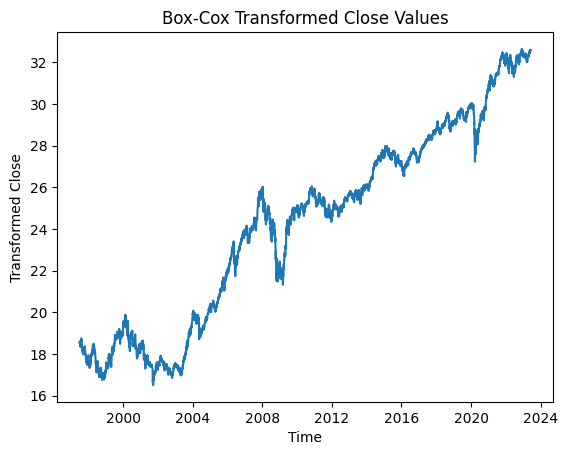

In [ ]:
import matplotlib.pyplot as plt

# Plot the transformed values against the time
plt.plot(stock["Date"], stock["Close"])
plt.xlabel('Time')
plt.ylabel('Transformed Close')
plt.title('Box-Cox Transformed Close Values')
plt.show()

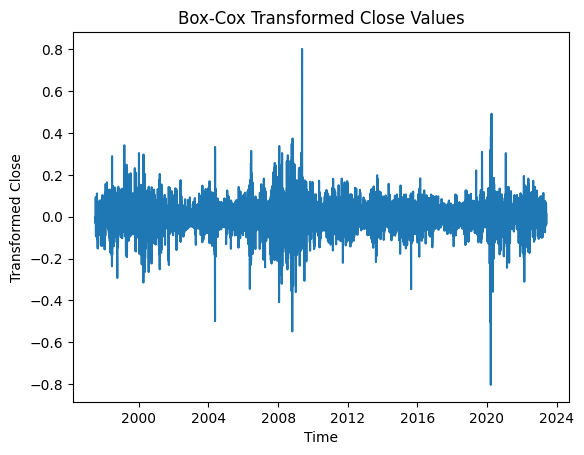

In [ ]:
# Calculate the first difference of the "Close" column
stock['Close_diff'] = stock['Close'].diff()

# Plot the transformed values against the time
plt.plot(stock["Date"], stock["Close_diff"])
plt.xlabel('Time')
plt.ylabel('Transformed Close')
plt.title('Box-Cox Transformed Close Values')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import kpss

first_differenced = stock[1:]

# Perform the KPSS test on the subset time series
kpss_stat, p_value, lags, critical_values = kpss(first_differenced["Close_diff"])

# Print the results
print("KPSS Statistic:", kpss_stat)
print("p-value:", p_value)
print("Lags:", lags)
print("Critical Values:", critical_values)

KPSS Statistic: 0.09188833624635982
p-value: 0.1
Lags: 3
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


p_value = 0.10 > 0.05 => our transformed data is stationary

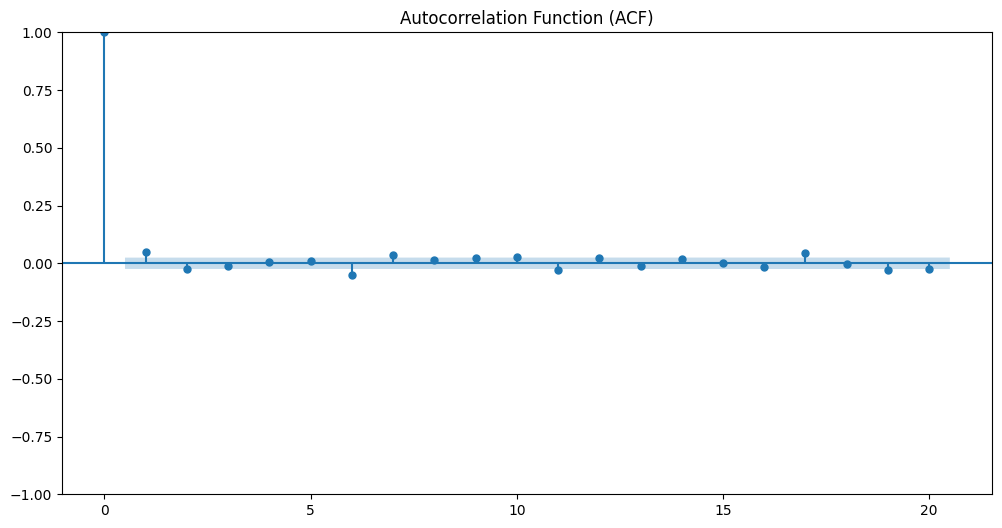

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


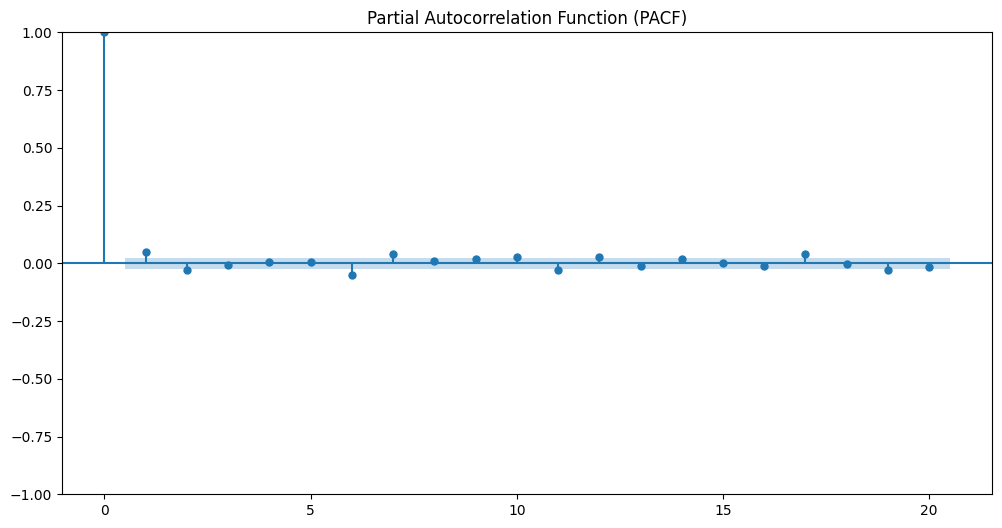

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(first_differenced["Close_diff"], lags=20, ax=ax)
ax.set_title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(first_differenced["Close_diff"], lags=20, ax=ax)
ax.set_title("Partial Autocorrelation Function (PACF)")
plt.show()

In [ ]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(first_differenced["Close_diff"])

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6385
Model:               SARIMAX(2, 0, 2)   Log Likelihood                7751.395
Date:                Tue, 13 Jun 2023   AIC                         -15490.790
Time:                        11:28:51   BIC                         -15450.220
Sample:                             0   HQIC                        -15476.745
                               - 6385                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.002      2.313      0.021       0.001       0.009
ar.L1         -0.5354      0.096     -5.582      0.000      -0.723      -0.347
ar.L2         -0.6724      0.067    -10.076      0.000      -0.803      -0.542
ma.L1          0.5836      0.096      6.080      0.000       0.395       0.772
ma.L2          0.6784      0.067     10.095      0.000       0.547       0.810
sigma2         0.0052   4.14e-05    124.639      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             22820.54
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.35
Prob(H) (two-sided):                  0.69   Kurtosis:                        12.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX(2, 0, 2) model
model = SARIMAX(first_differenced["Close_diff"], order=(2, 0, 2))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 6385
Model:               SARIMAX(2, 0, 2)   Log Likelihood                7748.551
Date:                Tue, 13 Jun 2023   AIC                         -15487.102
Time:                        11:59:00   BIC                         -15453.294
Sample:                             0   HQIC                        -15475.399
                               - 6385                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5272      0.096     -5.483      0.000      -0.716      -0.339
ar.L2         -0.6674      0.067     -9.973      0.000      -0.799      -0.536
ma.L1          0.5763      0.096      5.990      0.0

'# Get the predicted values for the same period\ny_pred = model_fit.fittedvalues\n\n# Print the predicted values\nprint(first_differenced["Close_diff"])\nprint(y_pred)'

In [ ]:
# Get the predicted values for the same period
y_pred = model_fit.fittedvalues

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(first_differenced["Close_diff"], y_pred)

print(mse)

0.0051694476174733335


We have conducted some time series analysis, but for now let us do some artificial neural network.

**3- Artificial Neural Network**

**3-1. Basic Implementation**



In [ ]:
df_1 = pd.read_csv("/content/sample_data/historical_data.csv")
df_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0
1,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0
2,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0
3,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0
4,1997-07-08,4285.649902,4313.000000,4252.490234,4306.390137,4306.390137,0
...,...,...,...,...,...,...,...
6381,2023-05-29,62801.539062,63026.000000,62801.539062,62846.378906,62846.378906,9600
6382,2023-05-30,62839.851562,63036.121094,62737.398438,62969.128906,62969.128906,7800
6383,2023-05-31,62839.968750,62876.769531,62401.019531,62622.238281,62622.238281,7300
6384,2023-06-01,62736.468750,62762.410156,62359.140625,62428.539062,62428.539062,8000


In [ ]:
# Add lagged values as a new feature
df_1['Close_ma2'] = df_1['Close'].rolling(window=2).mean()
df_1.at[0, 'Close_ma2'] = df_1['Close'].iloc[0]

In [ ]:
average_df.columns = ["Date", "sentiment_label","sentiment_category"]

In [ ]:
df_1["Date"] = pd.to_datetime(df_1["Date"])
average_df["Date"] = pd.to_datetime(average_df["Date"])
DS = pd.merge(df_1[["Date", "Close", "Close_ma2"]], average_df[["Date", "sentiment_label"]], on="Date")

In [ ]:
DS

,Date,Close,Close_ma2,sentiment_label
0,2001-01-02,4018.879883,3995.500000,-0.018231
1,2001-01-03,4060.020020,4039.449951,-0.014800
2,2001-01-04,4115.370117,4087.695068,0.009842
3,2001-01-05,4183.729980,4149.550049,0.028646
4,2001-01-08,4120.430176,4152.080078,-0.055812
...,...,...,...,...
5201,2022-03-25,57362.199219,57478.939453,-0.105569
5202,2022-03-28,57593.488281,57477.843750,-0.049460
5203,2022-03-29,57943.648438,57768.568359,-0.065885
5204,2022-03-30,58683.988281,58313.818359,-0.077454


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [ ]:
# Split the data into train and test sets
train_size = int(len(DS) * 0.7)  # 70% for training
train_data = DS[:train_size]
test_data = DS[train_size:]

# Separate the features and target variables for training and testing
train_X = train_data[['Close_ma2', 'sentiment_label']]
train_y = train_data['Close']
test_X = test_data[['Close_ma2', 'sentiment_label']]
test_y = test_data['Close']

# Scale the input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [ ]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Train the model
model.fit(X_train_scaled, train_y, epochs=100, batch_size=32)

Epoch 1/100
114/114 [==============================] - 2s 6ms/step - loss: 239658896.0000
Epoch 2/100
114/114 [==============================] - 1s 4ms/step - loss: 238752256.0000
Epoch 3/100
114/114 [==============================] - 1s 5ms/step - loss: 235283952.0000
Epoch 4/100
114/114 [==============================] - 0s 4ms/step - loss: 227657376.0000
Epoch 5/100
114/114 [==============================] - 1s 5ms/step - loss: 214817712.0000
Epoch 6/100
114/114 [==============================] - 0s 3ms/step - loss: 196302272.0000
Epoch 7/100
114/114 [==============================] - 0s 3ms/step - loss: 172479360.0000
Epoch 8/100
114/114 [==============================] - 0s 3ms/step - loss: 144874224.0000
Epoch 9/100
114/114 [==============================] - 0s 3ms/step - loss: 115783088.0000
Epoch 10/100
114/114 [==============================] - 0s 3ms/step - loss: 88215640.0000
Epoch 11/100
114/114 [==============================] - 0s 3ms/step - loss: 65080624.0000
Epoch 12/1

In [ ]:
# Predict using the fitted model
predictions = model.predict(X_test_scaled)

49/49 [==============================] - 1s 7ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE
mse = mean_squared_error(test_y, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 7195285.340172666


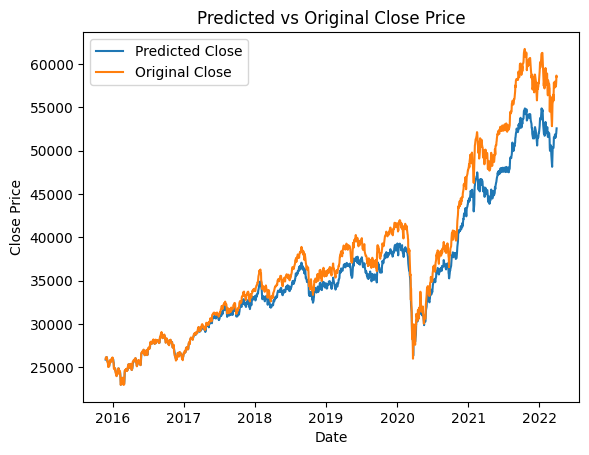

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted data
plt.plot(test_data["Date"], predictions, label='Predicted Close')

# Plot the original close data
plt.plot(test_data["Date"], test_y, label='Original Close')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs Original Close Price')

# Add legend
plt.legend()

# Display the plot
plt.show()

**3-2. Long Short-Term Memory**

In [ ]:
LSTM_data = DS[["Close_ma2","sentiment_label","Close"]]

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
LSTM_data = scaler.fit_transform(LSTM_data)

In [ ]:
# split into train and test sets
train_size = int(len(LSTM_data) * 0.67)
test_size = len(LSTM_data) - train_size
train, test = LSTM_data[0:train_size,:], LSTM_data[train_size:len(LSTM_data),:]
print(len(train), len(test))

3488 1718


In [ ]:
# This converts the array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
3486/3486 - 11s - loss: 0.0015 - 11s/epoch - 3ms/step
Epoch 2/100
3486/3486 - 6s - loss: 1.5012e-05 - 6s/epoch - 2ms/step
Epoch 3/100
3486/3486 - 7s - loss: 9.8192e-06 - 7s/epoch - 2ms/step
Epoch 4/100
3486/3486 - 7s - loss: 9.9715e-06 - 7s/epoch - 2ms/step
Epoch 5/100
3486/3486 - 6s - loss: 1.0457e-05 - 6s/epoch - 2ms/step
Epoch 6/100
3486/3486 - 6s - loss: 1.0077e-05 - 6s/epoch - 2ms/step
Epoch 7/100
3486/3486 - 6s - loss: 1.0067e-05 - 6s/epoch - 2ms/step
Epoch 8/100
3486/3486 - 8s - loss: 1.0000e-05 - 8s/epoch - 2ms/step
Epoch 9/100
3486/3486 - 6s - loss: 1.0452e-05 - 6s/epoch - 2ms/step
Epoch 10/100
3486/3486 - 7s - loss: 1.0169e-05 - 7s/epoch - 2ms/step
Epoch 11/100
3486/3486 - 6s - loss: 9.7318e-06 - 6s/epoch - 2ms/step
Epoch 12/100
3486/3486 - 7s - loss: 1.0359e-05 - 7s/epoch - 2ms/step
Epoch 13/100
3486/3486 - 6s - loss: 9.8557e-06 - 6s/epoch - 2ms/step
Epoch 14/100
3486/3486 - 7s - loss: 1.0006e-05 - 7s/epoch - 2ms/step
Epoch 15/100
3486/3486 - 6s - loss: 1.0345e-0

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

54/54 [==============================] - 0s 5ms/step
Train Score: 0.00 RMSE
Test Score: 0.03 RMSE


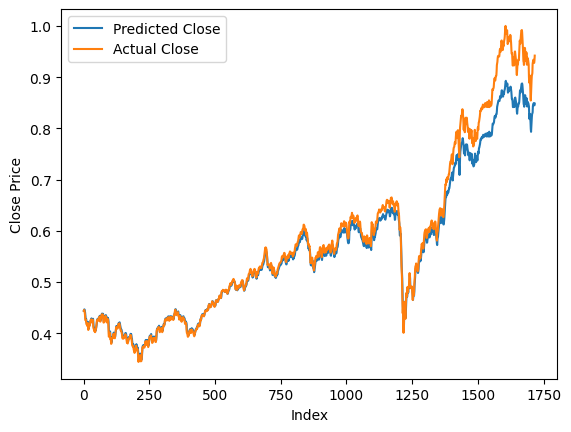

In [ ]:
# Create a dataframe with consecutive numbers
df_index = pd.DataFrame({'Index': np.arange(1, len(testY) + 1)})

# Plot the predicted data
plt.plot(df_index['Index'], testPredict, label='Predicted Close')

# Plot the original close data
plt.plot(df_index['Index'], testY, label='Actual Close')

# Add labels and legend to the plot
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()
